# Examen 2 - Classification

## Author: Ricardo Vallejo

### 1.1. Load DATA

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

df = pd.read_excel("winequality-red.xlsx")
pd.set_option('display.max_rows', None)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0


## 1.2. Identifier les différentes variables et leur type.


In [60]:
print('DATA information:')
display(df.info())

DATA information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

## 1.3. Répartissez les données en deux ensembles 
70% pour l’entrainement
(train) et 30% pour le test (test) (random_state =10). Vérifiez le
nombre d’individus dans chaque classe de l’ensemble train.

In [61]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, stratify = df['quality'], random_state = 10)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 1248 to 245
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1119 non-null   float64
 1   volatile acidity      1119 non-null   float64
 2   citric acid           1119 non-null   float64
 3   residual sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free sulfur dioxide   1119 non-null   float64
 6   total sulfur dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
 11  quality               1119 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 113.6 KB


In [63]:
train.groupby('quality').size()

quality
0    967
1    152
dtype: int64

## 1.4. Créer des matrices de caractéristiques (x_train, x_test), 
des vecteurs de classes (y_train, y_test) (facultative)

In [64]:
target_column='quality'

predictors = ['fixed acidity','volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target = [target_column]

X_train = train[predictors]
Y_train = train[target_column]

X_test = test[predictors]
Y_test = test[target_column]


In [65]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1248,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9
1128,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9
1312,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
566,8.5,0.440,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4
953,10.9,0.530,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.7


In [66]:
Y_train.head()

1248    0
1128    0
1312    0
566     0
953     0
Name: quality, dtype: int64

## 2.1. Développez un arbre de décision
qui permet de prédire la quality à
partir de l’ensemble des caractéristiques.
NB : considérez une profondeur de 2

In [89]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =2, random_state = 1)
desicionTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

[Text(279.0, 362.4, 'alcohol <= 11.55\ngini = 0.235\nsamples = 1119\nvalue = [967, 152]\nclass = 0'),
 Text(139.5, 217.44, 'volatile acidity <= 0.375\ngini = 0.147\nsamples = 942\nvalue = [867, 75]\nclass = 0'),
 Text(69.75, 72.47999999999996, 'gini = 0.378\nsamples = 154\nvalue = [115, 39]\nclass = 0'),
 Text(209.25, 72.47999999999996, 'gini = 0.087\nsamples = 788\nvalue = [752, 36]\nclass = 0'),
 Text(418.5, 217.44, 'sulphates <= 0.685\ngini = 0.492\nsamples = 177\nvalue = [100, 77]\nclass = 0'),
 Text(348.75, 72.47999999999996, 'gini = 0.37\nsamples = 98\nvalue = [74, 24]\nclass = 0'),
 Text(488.25, 72.47999999999996, 'gini = 0.442\nsamples = 79\nvalue = [26, 53]\nclass = 1')]

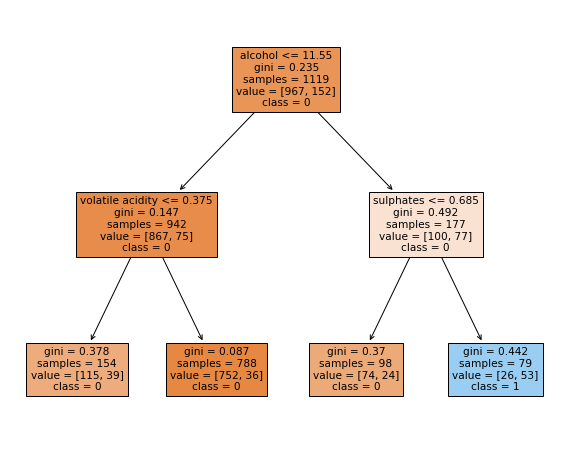

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = predictors, class_names = ["0", "1"], filled = True)

## 2.3. Identifiez les variables retenues.

<BarContainer object of 11 artists>

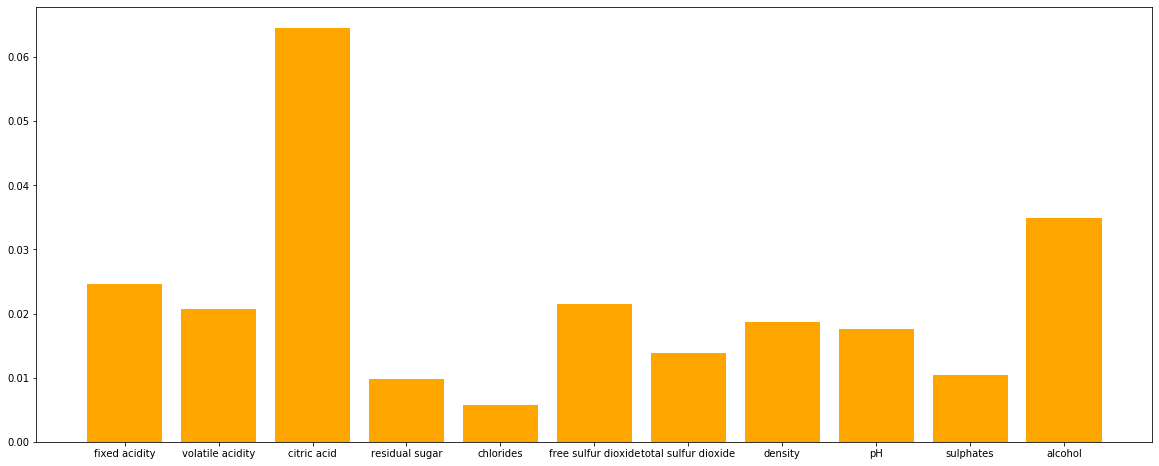

In [108]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize = (20,8))
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
selector = VarianceThreshold()
X_train_tresholding = selector.fit_transform(X_train_normalized)
plt.bar(x=predictors, height=selector.variances_, color='orange')

## 2.4. Déterminer le taux de classification global et les taux de classification
par classe.

In [91]:
from sklearn import metrics

Y_prediction = desicionTree.predict(X_test)
print('Presicion gloabal tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

Presicion gloabal tree:  0.883


In [92]:
from sklearn.metrics import confusion_matrix

qualites = Y_test
predictions = np.array(Y_prediction)

confusion_matrix(qualites, predictions)

array([[402,  13],
       [ 43,  22]], dtype=int64)

In [93]:
test.groupby('quality').size()

quality
0    415
1     65
dtype: int64

In [72]:
# De 480 donnes de test, 402+22=424 sont de donnes bien classifies.
# De la class Qualite=0 on a mal classifie 13
# De la class Qualite=1 on a mals classifie 43



In [73]:
print(metrics.accuracy_score(Y_prediction, Y_test)) #Gloabal Taux

0.8833333333333333


In [74]:
# Pour chaque class

In [75]:
print(metrics.recall_score(Y_prediction, Y_test,pos_label=0))


0.903370786516854


In [76]:
print(metrics.recall_score(Y_prediction, Y_test,pos_label=1))


0.6285714285714286


In [102]:
# L'indicateur de que le taux est tres bas pour la class 1

In [78]:
# Le model reponds mieux pour un class que pour autre, et 62% cest bas comme model de classification.

## 3.1 Développez un perceptron multicouche qui permet de prédire la quality
à partir de l’ensemble des caractéristiques.
NB : considérez 3 couches de 8 neurones chacune et un nombre d’itération
de 500.

In [94]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation = "tanh", solver='adam', max_iter=500)

model.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 3.2  Déterminer le taux de classification global et les taux de classification
par classe à partir des données de tests

In [95]:
from sklearn.metrics import accuracy_score

Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)
accuracy_score(Y_train, Y_predicted_train)

0.8838248436103664

In [96]:
print(metrics.recall_score(Y_prediction, Y_test,pos_label=0))

0.903370786516854


In [97]:
print(metrics.recall_score(Y_prediction, Y_test,pos_label=1))

0.6285714285714286


## 3.3. Interprétez les résultats en les comparant à ceux des arbres de décision

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_predicted_test))


[[391  24]
 [ 43  22]]


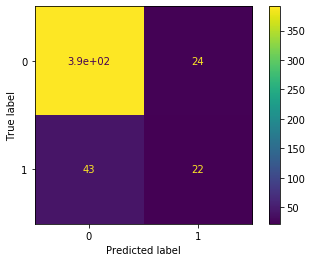

In [100]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, Y_test)
plt.show()